In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/scratch3/zha439/REPA


In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [17]:
base_path = "evals_2"

exps = [
    "sit-xl-linear-dinov2-b-enc8-50k",
    # "sit-xl-linear-dinov2-b-enc8-patch2patch-coeff0.2-50k",
    # "sit-xl-linear-dinov2-b-enc8-sample2sample-coeff0.2-50k",
    # "sit-xl-linear-dinov2-b-enc8-patch2patch-only-coeff0.2-50k",
    "sit-xl-linear-dinov2-b-enc8-sample2sample-only-coeff0.2-50k",
    # "sit-xl-linear-dinov2-b-enc8-patch2patch-jsd-coeff0.2-50k",
    # "sit-xl-linear-dinov2-b-enc8-patch2patch-jsd-only-coeff0.2-50k",
    # "sit-xl-linear-dinov2-b-enc8-sample2sample-jsd-coeff0.2-50k",
    "sit-xl-linear-dinov2-b-enc8-sample2sample-jsd-only-coeff0.2-50k",

#     "sit-xl-linear-dinov2-b-enc8-patch2patch-aftproj-coeff0.2-50k",
#     "sit-xl-linear-dinov2-b-enc8-patch2patch-jsd-aftproj-coeff0.2-50k",
#     "sit-xl-linear-dinov2-b-enc8-sample2sample-aftproj-coeff0.2-50k",
#     "sit-xl-linear-dinov2-b-enc8-sample2sample-jsd-aftproj-coeff0.2-50k",
#     "sit-xl-linear-dinov2-b-enc8-patch2patch-detach-coeff0.2-50k",
#     "sit-xl-linear-dinov2-b-enc8-patch2patch-jsd-detach-coeff0.2-50k",
#     "sit-xl-linear-dinov2-b-enc8-sample2sample-detach-coeff0.2-50k",
#     "sit-xl-linear-dinov2-b-enc8-sample2sample-jsd-detach-coeff0.2-50k",
]

attrs = ["Inception Score", "FID", "sFID"]

def get_stats(attr):
    exps_steps = {}
    for f in sorted(os.listdir(base_path)):
        if not f.endswith(".csv"):
            continue
        csv_path = os.path.join(base_path, f)
        for exp in exps:
            if f.startswith(exp):
                steps = f.split("_")[1].split(".")[0]
                df = pd.read_csv(csv_path)
                if exp not in exps_steps:
                    exps_steps[exp] = {}
                exps_steps[exp][steps] = df[attr].values.item()
                break
    return exps_steps

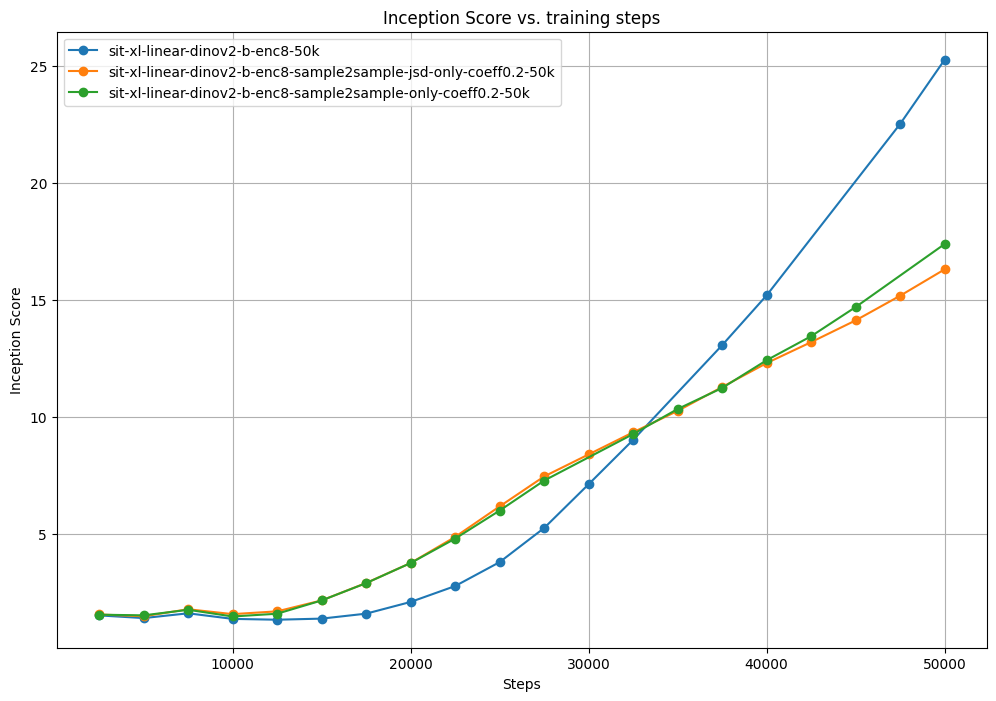

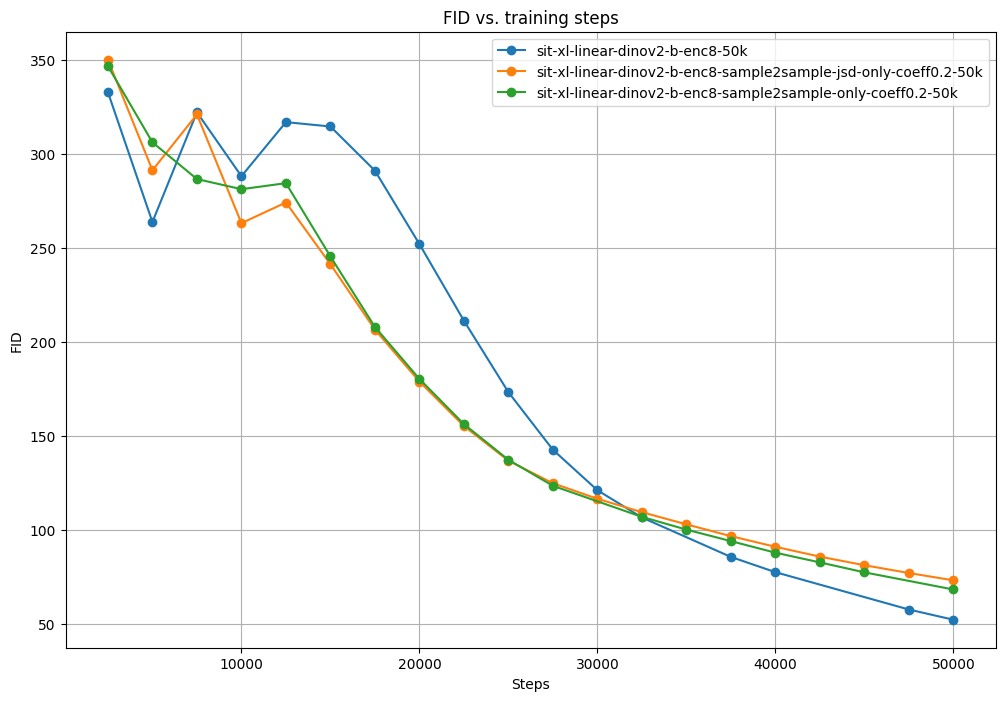

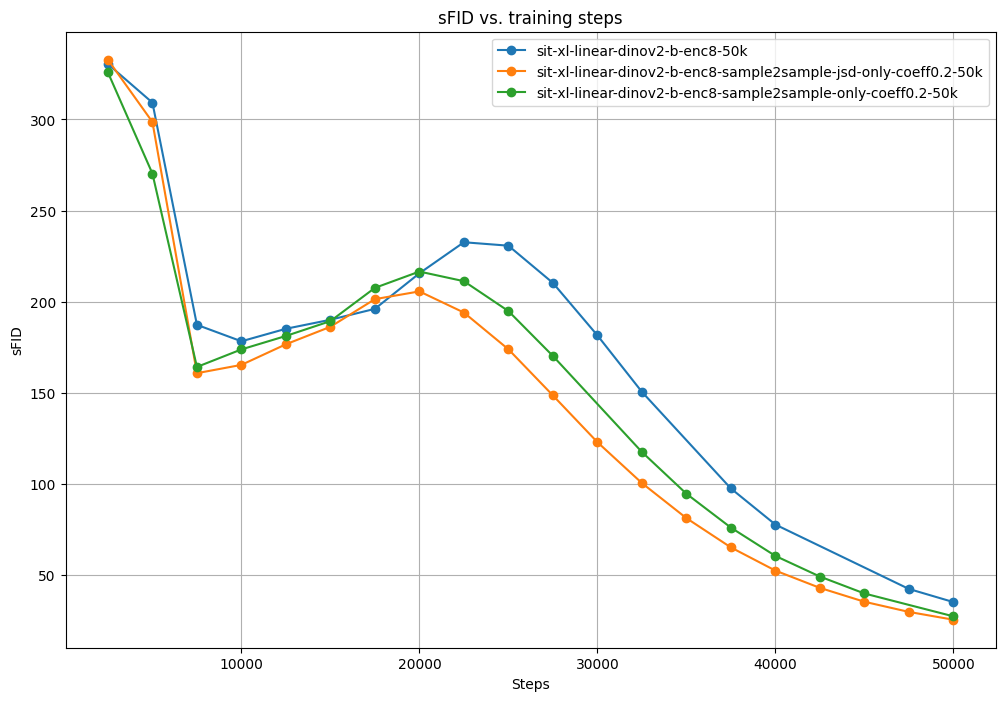

In [18]:
for attr in attrs:
    exps_steps = get_stats(attr)
    plt.figure(figsize=(12, 8))
    for exp, inner_dict in exps_steps.items():
        plt.plot([int(elem) for elem in inner_dict.keys()], inner_dict.values(), marker="o", label=exp)
    plt.xlabel("Steps")
    plt.ylabel(attr)
    plt.title(f"{attr} vs. training steps")
    plt.grid()
    plt.legend()
    plt.show()